In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


✅ Dataset cargado: 4219 muestras, 138 columnas

📊 Primeras filas del dataset:
   frame      label  point_0_x  point_0_y  point_0_z  point_0_visibility  \
0      0  caminando   0.385824   0.288731  -0.316430            0.999950   
1      1  caminando   0.384432   0.289063  -0.321157            0.999950   
2      2  caminando   0.383571   0.289608  -0.325282            0.999951   
3      3  caminando   0.382982   0.290198  -0.324727            0.999951   
4      4  caminando   0.382850   0.290756  -0.327194            0.999952   

   point_1_x  point_1_y  point_1_z  point_1_visibility  ...  point_31_z  \
0   0.393978   0.278143  -0.295397            0.999776  ...    0.126990   
1   0.393327   0.278611  -0.300152            0.999779  ...    0.149069   
2   0.392864   0.279315  -0.304411            0.999784  ...    0.146493   
3   0.392464   0.280001  -0.303705            0.999787  ...    0.147500   
4   0.392366   0.280679  -0.306286            0.999792  ...    0.144101   

   point_31_vi

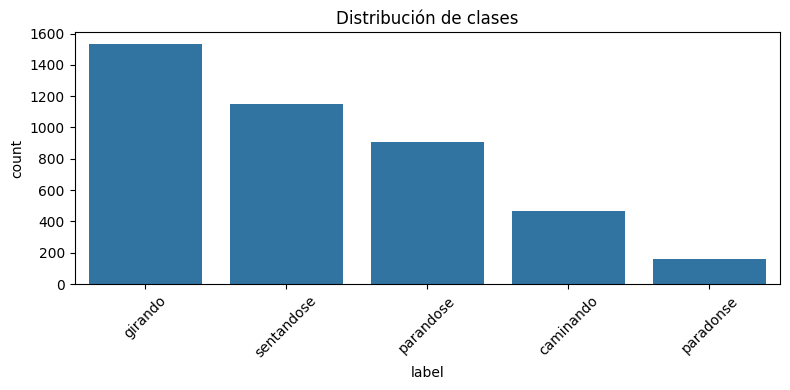

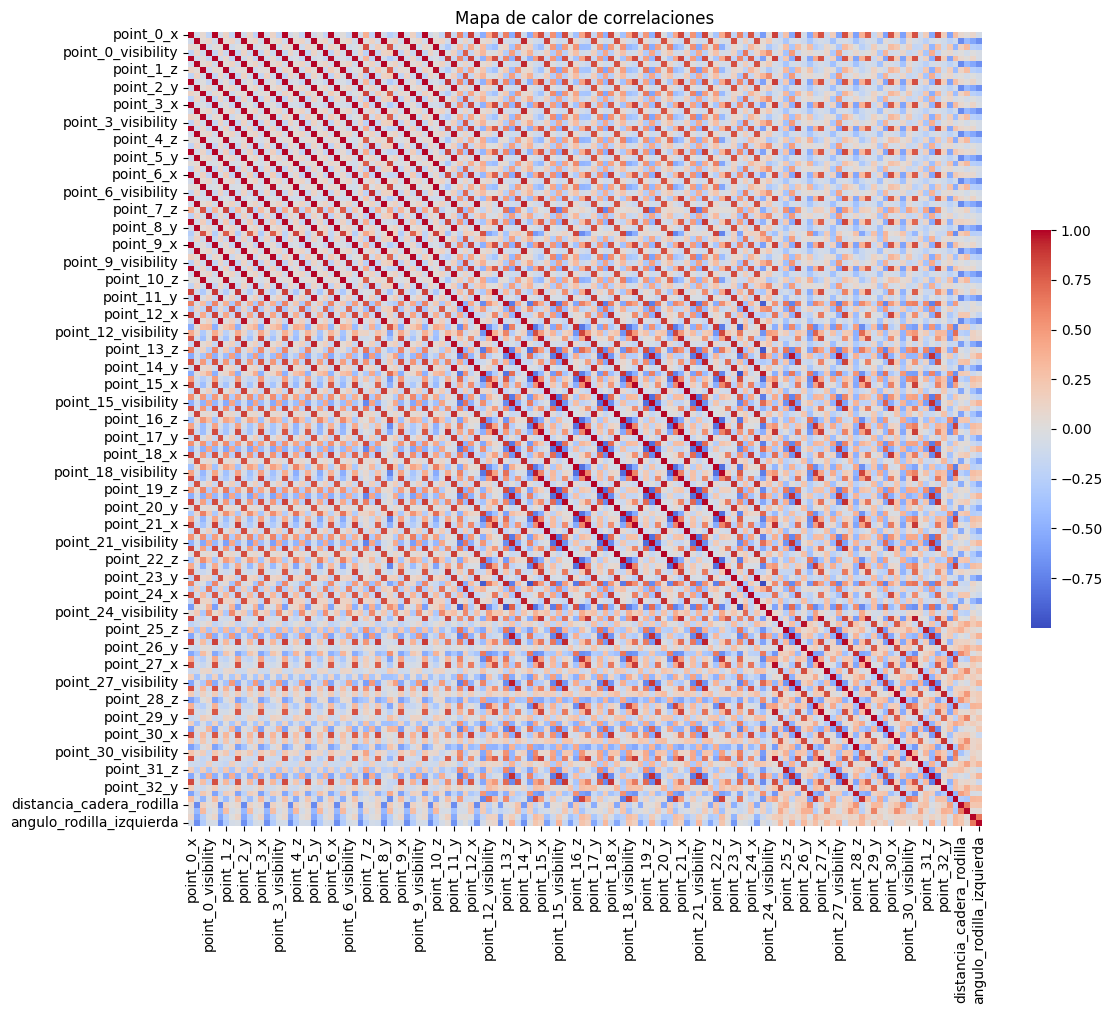

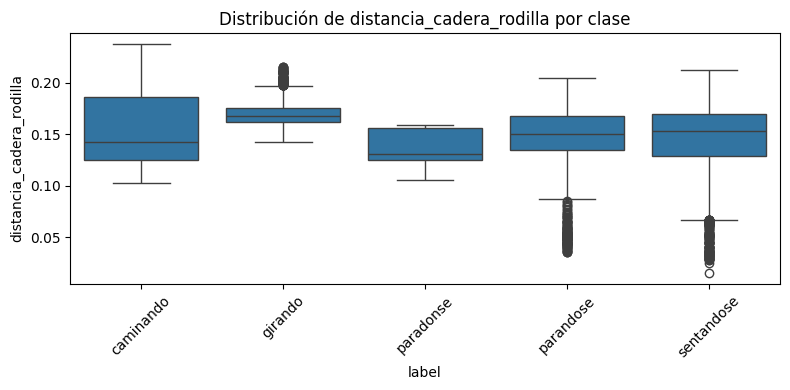

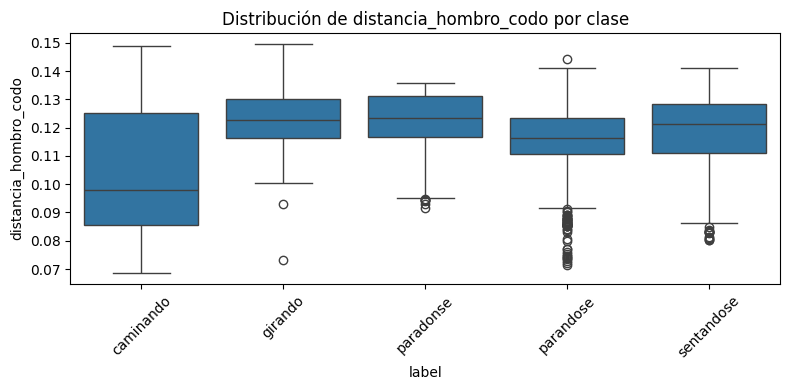

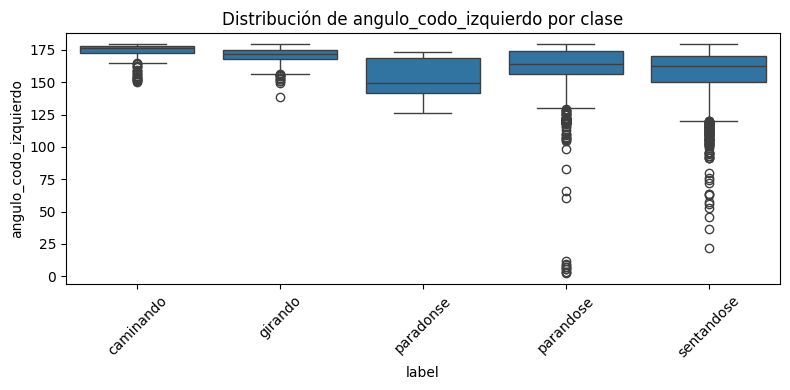

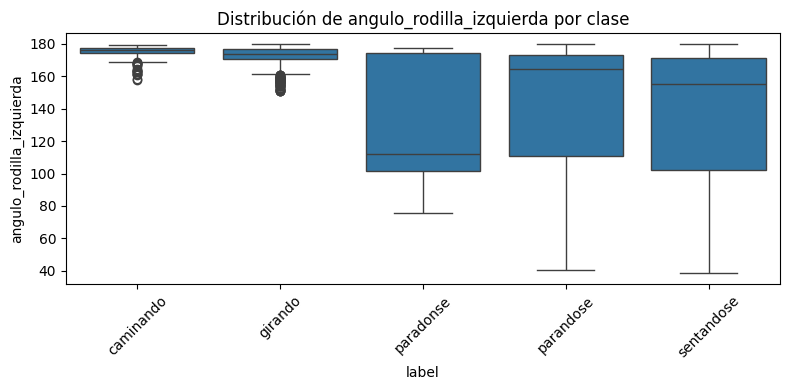


🚨 Outliers por variable (z-score > 3):
point_3_visibility     133
point_7_visibility     132
point_1_visibility     132
point_2_visibility     131
point_11_visibility    114
point_0_visibility     106
point_8_visibility     103
point_10_visibility    103
point_4_visibility     103
point_9_visibility     100
dtype: int64

📉 Variancia por feature (baja varianza puede ser irrelevante):
point_12_visibility    9.592300e-08
point_11_visibility    2.376907e-06
point_24_visibility    2.647168e-06
point_23_visibility    5.126670e-06
point_10_visibility    2.207475e-05
point_0_visibility     4.380550e-05
point_6_visibility     4.396011e-05
point_8_visibility     5.001328e-05
point_5_visibility     6.240126e-05
point_9_visibility     6.600160e-05
dtype: float64


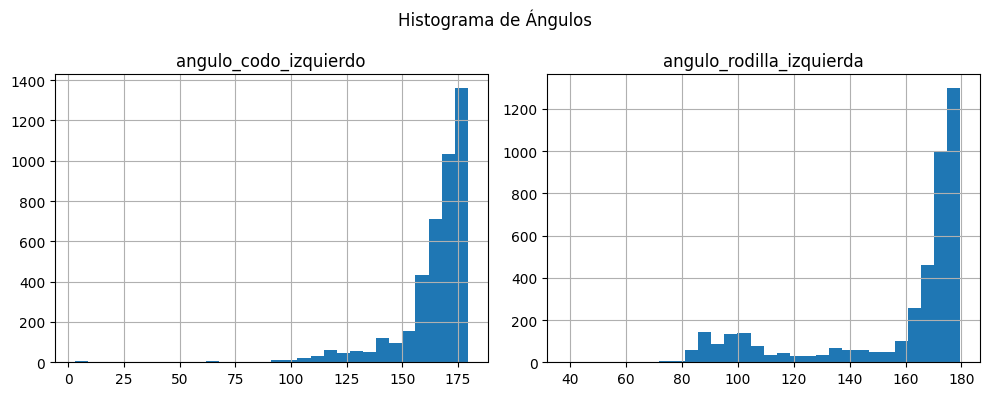

In [ ]:

SCRIPT_DIR = os.getcwd()
DATA_PATH = os.path.join(SCRIPT_DIR, "..", "data", "annotations", "keypoints_dataset.csv")

df = pd.read_csv(DATA_PATH)
print(f"✅ Dataset cargado: {df.shape[0]} muestras, {df.shape[1]} columnas\n")

print("📊 Primeras filas del dataset:")
print(df.head())

print("\n📈 Resumen estadístico:")
print(df.describe())

print("\n🔍 Revisión de valores nulos:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

print("\n📋 Columnas disponibles:")
print(df.columns.tolist())

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="label", order=df["label"].value_counts().index)
plt.title("Distribución de clases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

features_numericas = df.select_dtypes(include=["float64", "int64"]).drop(columns=["frame"], errors='ignore')
plt.figure(figsize=(12, 10))
corr = features_numericas.corr()
sns.heatmap(corr, cmap="coolwarm", center=0, square=True, cbar_kws={"shrink": 0.5})
plt.title("Mapa de calor de correlaciones")
plt.tight_layout()
plt.show()

features_claves = ["distancia_cadera_rodilla", "distancia_hombro_codo", 
                   "angulo_codo_izquierdo", "angulo_rodilla_izquierda"]

for feature in features_claves:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="label", y=feature, data=df)
    plt.title(f"Distribución de {feature} por clase")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

z_scores = np.abs(zscore(features_numericas))
outliers = (z_scores > 3).sum()
print("\n🚨 Outliers por variable (z-score > 3):")
print(pd.Series(outliers, index=features_numericas.columns).sort_values(ascending=False).head(10))

variancias = features_numericas.var().sort_values(ascending=True)
print("\n📉 Variancia por feature (baja varianza puede ser irrelevante):")
print(variancias.head(10))

df[["angulo_codo_izquierdo", "angulo_rodilla_izquierda"]].hist(bins=30, figsize=(10, 4))
plt.suptitle("Histograma de Ángulos")
plt.tight_layout()
plt.show()
